In [1]:
import pandas as pd 
import numba as np

import matplotlib.pylab as plt 
import plotly.express as ex 
import seaborn as sns 

import missingno as miss 

import ipywidgets

In [1]:
%pip install xelatex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [2]:
df=pd.read_csv('world_cheese_awards_2021.csv')
df.head()

,Unnamed: 0,company,product_name,rating,category,country,county
0,0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,NaN
1,1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,NaN
2,2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,NaN
3,3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN
4,4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN


What are the best cheeses worldwide?
Which is the cheesiest country?spain
What is the best cheese in each category?
What are the best cheeses in each region?
Which companies have the highest rating overall?
Which countries have the best cheese?
Which region has the best cheese?

<AxesSubplot:>

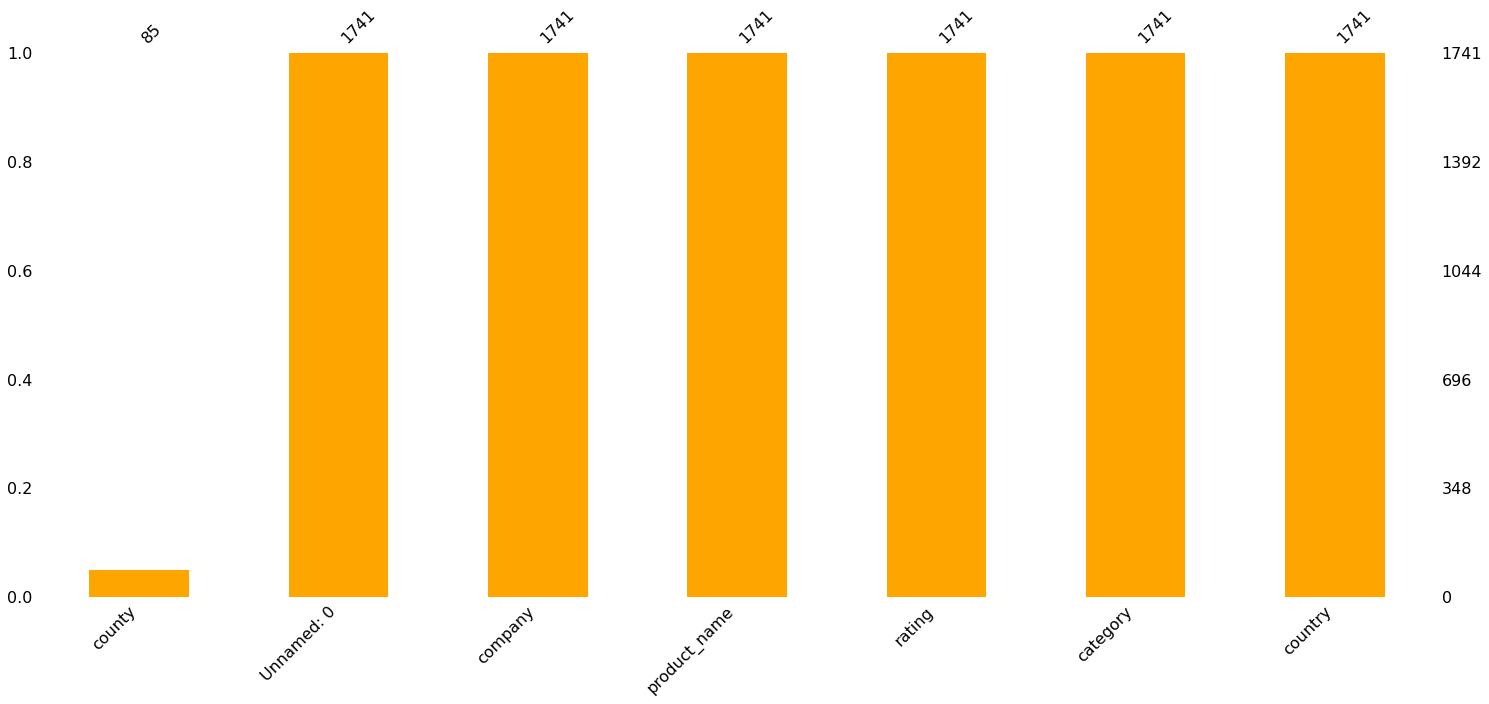

In [3]:
miss.bar(df,color='orange',sort='ascending')

In [4]:
df.drop('county',axis=1,inplace=True)

In [5]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0      0
company         0
product_name    0
rating          0
category        0
country         0
dtype: int64

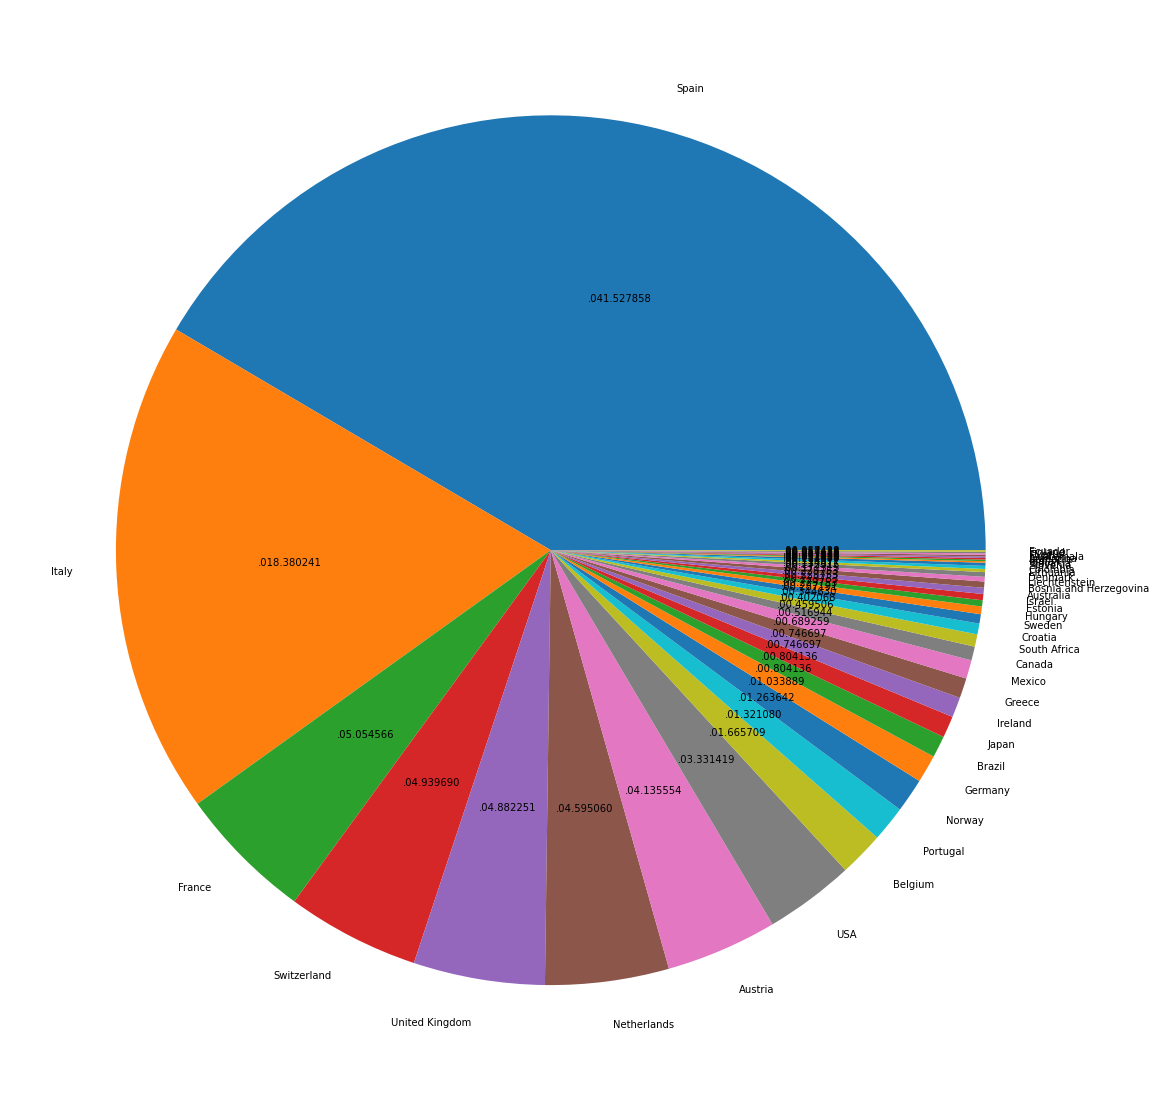

In [6]:
plt.figure(figsize=(20,20))
plt.pie(labels=df.country.value_counts().index,x=df.country.value_counts().values,autopct=".0%f")
plt.show()

In [7]:
df.rating.unique()

array(['GOLD', 'BRONZE', 'SILVER', 'SUPER GOLD'], dtype=object)

In [8]:
best_chase=df[df.rating=='SUPER GOLD']

In [9]:
df.category.value_counts().head(10)

5247 - Any other semi – hard Cows' milk cheese not in any other class                  99
5103 - Hard ewes’ milk cheese plain                                                    91
5248 - Any other hard Cows' milk cheese not in any other class                         82
5501 - Cheese made with the milk of more than one animal                               78
5004 - Hard goats’ milk cheese plain                                                   74
5102 - Semi-hard ewes’ milk cheese plain                                               68
5003 - Semi-hard goats’ milk cheese plain                                              67
5506 - Any hard cheese that has been awarded a Denomination of Origin (PDO/PGI/AOC)    57
5005 - Goats’ milk cheese with additives                                               56
5105 - Ewes’ milk cheese with additives                                                48
Name: category, dtype: int64

In [10]:
n_rate=[]
for i in df.rating:
    if i == 'SUPER GOLD':
        n_rate.append(4)
    elif i == 'GOLD':
        n_rate.append(3)
    elif i == 'SILVER':
        n_rate.append(2)
    elif i == 'BRONZE':
        n_rate.append(1)
df['n_rate']=n_rate

In [11]:
df

,Unnamed: 0,company,product_name,rating,category,country,n_rate
0,0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,3
1,1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,1
2,2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,2
3,3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,1
4,4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,1
...,...,...,...,...,...,...,...
1736,1736,Macroom Buffalo Cheese Products Website,Macroom Buffalo Ricotta 200g,SILVER,5709 - Ricotta made with buffalos' milk,Ireland,2
1737,1737,Diaccialone Società Agricola Website,Ricotta di Bufala 250g,BRONZE,5709 - Ricotta made with buffalos' milk,Italy,1
1738,1738,Macroom Buffalo Cheese Products Website,Macroom Buffalo Greek Style Cheese 180g,BRONZE,5710 - Any other buffalo's milk cheese not in ...,Ireland,1
1739,1739,CILENTO SPA Website,Lactose free Mozzarella di Bufala Campana PDO ...,SILVER,5710 - Any other buffalo's milk cheese not in ...,Italy,2


In [26]:
country=df.groupby('country')['n_rate'].mean().sort_values(ascending=False)

<BarContainer object of 5 artists>

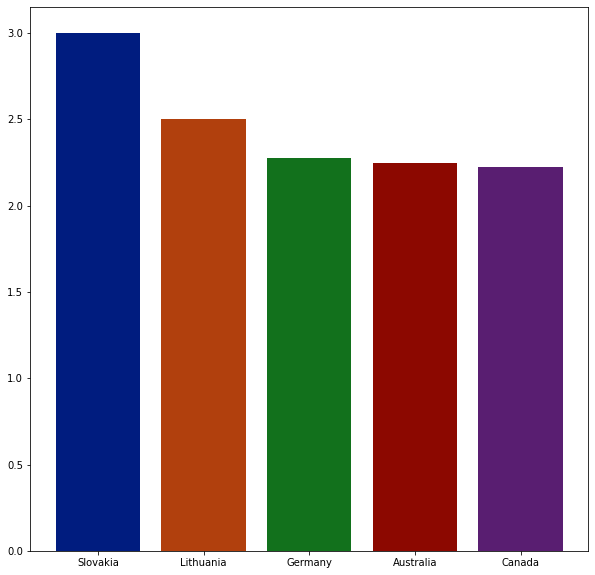

In [24]:
plt.figure(figsize=(10,10))
c=sns.color_palette(palette='dark',n_colors=5)
plt.bar(country.head(5).index,country.head(5).values,color=c)

# What is the best cheese in each category?


In [64]:
a=df[df.n_rate==4]

In [68]:
b=a.groupby(['category','product_name'])
b.first()

Unnamed: 0  \
category                                           product_name                                                    
5002 - Soft goats’ milk cheese plain – mouldrip... Río Vero                                                   44   
                                                   Torta de Rufino                                            43   
                                                   Trufflyn Goats Cheese                                      47   
5003 - Semi-hard goats’ milk cheese plain          Goat cheese extra matured                                  73   
                                                   La Mascotte  View  Stockists                               55   
...                                                                                                          ...   
5515 - Feta plain without oil or additives         Organic Feta PDO                                         1632   
5518 - Any cheese that cannot be placed in any ... Felsen-Taler                                             1634   
                                                   Formaggio Testun Sepertino al Barolo DOCG                1643   
5603 - Processed cheese or processed cheese spr... Crema de Queso Camembert / Camembert Cream Cheese        1665   
5707 - Buffalo's milk cheese blue                  Buffalo Blue                                             1735   

                                                                                                                                    company  \
category                                           product_name                                                                               
5002 - Soft goats’ milk cheese plain – mouldrip... Río Vero                                                    Quesos de Radiquero  Website   
                                                   Torta de Rufino                                    Hermanos Cuecas Morujo c. b.  Website   
                                                   Trufflyn Goats Cheese                                    Harvey & Brockless Ltd  Website   
5003 - Semi-hard goats’ milk cheese plain          Goat cheese extra matured                                Royal FrieslandCampina  Website   
                                                   La Mascotte  View  Stockists                                       Fromages CDA  Website   
...                                                                                                                                     ...   
5515 - Feta plain without oil or additives         Organic Feta PDO                                                        Menikio  Website   
5518 - Any cheese that cannot be placed in any ... Felsen-Taler                                                         MALKO GmbH  Website   
                                                   Formaggio Testun Sepertino al Barolo DOCG              Caseificio Sepertino Snc  Website   
5603 - Processed cheese or processed cheese spr... Crema de Queso Camembert / Camembert Cream Cheese   Quesería Lafuente, S. A. U.  Website   
5707 - Buffalo's milk cheese blue                  Buffalo Blue                                       Shepherds Purse Cheeses Ltd.  Website   

                                                                                                          rating  \
category                                           product_name                                                    
5002 - Soft goats’ milk cheese plain – mouldrip... Río Vero                                           SUPER GOLD   
                                                   Torta de Rufino                                    SUPER GOLD   
                                                   Trufflyn Goats Cheese                              SUPER GOLD   
5003 - Semi-hard goats’ milk cheese plain          Goat cheese extra matured                          SUPER GOLD   
                                     


# What are the best cheeses in each region?

In [71]:
df.country.unique()

array(['France', 'Greece', 'Italy', 'Netherlands', 'Spain',
       'United Kingdom', 'Austria', 'Belgium', 'Japan', 'Portugal', 'USA',
       'Brazil', 'Canada', 'Cyprus', 'Norway', 'Bosnia and Herzegovina',
       'Colombia', 'Ireland', 'Israel', 'Slovakia', 'Switzerland',
       'Mexico', 'Romania', 'Croatia', 'South Africa', 'Finland',
       'Estonia', 'Germany', 'Hungary', 'Liechtenstein', 'Slovenia',
       'Sweden', 'Lithuania', 'Guatemala', 'India', 'Australia',
       'Denmark', 'Argentina', 'Ecuador'], dtype=object)

In [142]:
regon=[]

for i in df.country:
    if i =="Australia":
        regon.append("Australia")
       
    elif i =='USA'or i=='Canada'or i=='Mexico':
        regon.append("North America ")
        
    elif i=='Brazil'or i=='Colombia'or i=='Guatemala':
        regon.append("South America ")
    elif i == 'South Africa':
        regon.append("Africa ")
        print(i)
    elif i == 'Japan'or i== 'India':
        regon.append('asia')
    else : 
        regon.append("Europe")
df["regon"]=regon
df

South Africa
South Africa
South Africa
South Africa
South Africa
South Africa
South Africa
South Africa


,Unnamed: 0,company,product_name,rating,category,country,n_rate,regon
0,0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,3,Europe
1,1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,1,Europe
2,2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,2,Europe
3,3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,1,Europe
4,4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,1,Europe
...,...,...,...,...,...,...,...,...
1736,1736,Macroom Buffalo Cheese Products Website,Macroom Buffalo Ricotta 200g,SILVER,5709 - Ricotta made with buffalos' milk,Ireland,2,Europe
1737,1737,Diaccialone Società Agricola Website,Ricotta di Bufala 250g,BRONZE,5709 - Ricotta made with buffalos' milk,Italy,1,Europe
1738,1738,Macroom Buffalo Cheese Products Website,Macroom Buffalo Greek Style Cheese 180g,BRONZE,5710 - Any other buffalo's milk cheese not in ...,Ireland,1,Europe
1739,1739,CILENTO SPA Website,Lactose free Mozzarella di Bufala Campana PDO ...,SILVER,5710 - Any other buffalo's milk cheese not in ...,Italy,2,Europe


In [147]:
pd.set_option('display.max_rows', 1000)
df_3=df[ (df.n_rate>=3) ] 

df_3=df_3.groupby(["regon","product_name"])["n_rate"].max()

df_3.sort_values(ascending=False)

regon           product_name                                                                      
Europe          OSSAU IRATY MATOCQ                                                                    4
                De Graafstroom - Overjarig                                                            4
                Saint André 200g                                                                      4
                Queso Cabra Curado Orégano  View  Stockists                                           4
                Queijo Serramonte                                                                     4
                Queijo Serra da Estrela DOP Pingo Doce  View  Stockists                               4
                Epoisses Berthaut Perrière                                                            4
                Epoisses Berthaut 250g                                                                4
                Slob Ruby  View  Stockists                           

# Which companies have the highest rating overall?

In [156]:
com=df.groupby(df.company)["n_rate"].mean().sort_values(ascending=False).head(15)
com.values

array([4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. , 4. ,
       4. , 3.5])

In [157]:
ex.bar(x=com.index,y=com.values)

# Which countries have the best cheese?

In [158]:
cun=df.groupby(df.country)["n_rate"].mean().sort_values(ascending=False).head(15)

In [159]:
ex.bar(x=cun.index,y=cun.values)

# Which region has the best cheese?

In [162]:
re=df.groupby(df.regon)["n_rate"].mean().sort_values(ascending=False)

In [161]:
ex.bar(x=re.index,y=re.values)